In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly import tools
import plotly.express as py
# import plotly.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

df = pd.read_csv('bank.csv')
term_deposits = df.copy()

In [144]:
term_deposits

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [164]:
term_deposits.education.unique()

array([1, 2, 0, 3])

In [ ]:
import nbformat
print(nbformat.__version__)

In [ ]:
df.head()

In [ ]:
df.describe()

In [ ]:
df.info()

1. age: 고객의 나이
2. job: 고객의 직업
3. marital: 결혼 여부
4. education: 교육 수준
5. default: 신용 불량 여부
6. balance: 고객의 은행 계좌 잔액
7. housing: 주택 대출 여부
8. loan: 개인 대출 여부
9. contact: 고객과의 연락 방식
10. day: 마지막 연락 일
11. month: 마지막 연락 월
12. duration: 마지막 연락의 지속 시간
13. campaign: 캠페인 기간 동안 고객에게 연락한 횟수
14. pdays: 이전 캠페인에서 고객이 연락을 받은 날 수
15. previous: 이전 캠페인의 연락 횟수
16. poutcome: 이전 캠페인의 결과
17. deposit: 고객의 반응 (예: 예금 계좌 개설 여부)

In [ ]:
f, ax = plt.subplots(1, 2, figsize= (16, 8))

colors = ["#FA5858", "#64FE2E"]
labels ="Did not Open Term Suscriptions", "Opened Term Suscriptions"

plt.suptitle('Information on Term Suscriptions', fontsize = 20)

df['deposit'].value_counts().plot.pie(explode = [0, 0.25], autopct = '%1.2f%%', ax = ax[0], shadow = True, 
                                      colors = colors, 
                                      labels = labels, 
                                      fontsize = 12, 
                                      startangle = 25)

ax[0].set_ylabel('% of Condition of Loans', fontsize = 14)
palette = ["#64FE2E", "#FA5858"]

sns.barplot(x = "education", y = "balance", hue = 'deposit', data = df, palette = palette, estimator = lambda x: len(x) / len(df) * 100)
ax[1].set(ylabel = "(%)")
ax[1].set_xticklabels(df["education"].unique(), rotation = 0, rotation_mode = 'anchor')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

df.hist(bins=20, figsize=(14, 10), color='#E14906')
plt.show()

In [ ]:
df['deposit'].value_counts()

In [ ]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

g = sns.boxplot(x="default", y="balance", hue="deposit",
                    data=df, palette="muted", ax=ax1)

g.set_title("Amount of Balance by Term Suscriptions")

# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

g1 = sns.boxplot(x="job", y="balance", hue="deposit",
                 data=df, palette="RdBu", ax=ax2)

g1.set_xticklabels(df["job"].unique(), rotation=90, rotation_mode="anchor")
g1.set_title("Type of Work by Term Suscriptions")

g2 = sns.violinplot(data=df, x="education", y="balance", hue="deposit", palette="RdBu_r")

g2.set_title("Distribution of Balance by Education")


plt.show()

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
import squarify
df = df.drop(df.loc[df["balance"] == 0].index)


x = 0
y = 0
width = 100
height = 100

job_names = df['job'].value_counts().index
values = df['job'].value_counts().tolist()

normed = squarify.normalize_sizes(values, width, height)
rects = squarify.squarify(normed, x, y, width, height)

colors = ['rgb(200, 255, 144)','rgb(135, 206, 235)',
          'rgb(235, 164, 135)','rgb(220, 208, 255)',
          'rgb(253, 253, 150)','rgb(255, 127, 80)', 
         'rgb(218, 156, 133)', 'rgb(245, 92, 76)',
         'rgb(252,64,68)', 'rgb(154,123,91)']

shapes = []
annotations = []
counter = 0

for r in rects:
    shapes.append(
        dict(
            type = 'rect',
            x0 = r['x'],
            y0 = r['y'],
            x1 = r['x'] + r['dx'],
            y1 = r['y'] + r['dy'],
            line = dict(width=2),
            fillcolor = colors[counter]
        )
    )
    annotations.append(
        dict(
            x = r['x']+(r['dx']/2),
            y = r['y']+(r['dy']/2),
            text = values[counter],
            showarrow = False
        )
    )
    counter = counter + 1
    if counter >= len(colors):
        counter = 0
    
# For hover text
trace0 = go.Scatter(
    x = [ r['x']+(r['dx']/2) for r in rects],
    y = [ r['y']+(r['dy']/2) for r in rects],
    text = [ str(v) for v in job_names],
    mode='text',
)

layout = dict(
    title='Number of Occupations <br> <i>(From our Sample Population)</i>',
    height=700, 
    width=700,
    xaxis=dict(showgrid=False,zeroline=False),
    yaxis=dict(showgrid=False,zeroline=False),
    shapes=shapes,
    annotations=annotations,
    hovermode='closest'
)

# With hovertext
figure = dict(data=[trace0], layout=layout)

iplot(figure, filename='squarify-treemap')

In [ ]:
# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["deposit"] == "yes"]

occupations = df["job"].unique().tolist()

# Get the balances by jobs
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values

ages = [management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []

for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

In [ ]:
# Balance Distribution

# Create a Balance Category
df["balance_status"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["balance"] < 0, "balance_status"] = "negative"
    col.loc[(col["balance"] >= 0) & (col["balance"] <= 30000), "balance_status"] = "low"
    col.loc[(col["balance"] > 30000) & (col["balance"] <= 40000), "balance_status"] = "middle"
    col.loc[col["balance"] > 40000, "balance_status"] = "high"
    
# balance by balance_status
negative = df["balance"].loc[df["balance_status"] == "negative"].values.tolist()
low = df["balance"].loc[df["balance_status"] == "low"].values.tolist()
middle = df["balance"].loc[df["balance_status"] == "middle"].values.tolist()
high = df["balance"].loc[df["balance_status"] == "high"].values.tolist()


# Get the average by occupation in each balance category
job_balance = df.groupby(['job', 'balance_status'])['balance'].mean()


trace1 = go.Barpolar(
    r=[-199.0, -392.0, -209.0, -247.0, -233.0, -270.0, -271.0, 0, -276.0, -134.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Negative Balance',
    marker=dict(
        color='rgb(246, 46, 46)'
    )
)
trace2 = go.Barpolar(
    r=[319.5, 283.0, 212.0, 313.0, 409.0, 274.5, 308.5, 253.0, 316.0, 330.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Low Balance',
    marker=dict(
        color='rgb(246, 97, 46)'
    )
)
trace3 = go.Barpolar(
    r=[2128.5, 2686.0, 2290.0, 2366.0, 2579.0, 2293.5, 2005.5, 2488.0, 2362.0, 1976.0],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='Middle Balance',
    marker=dict(
        color='rgb(246, 179, 46)'
    )
)
trace4 = go.Barpolar(
    r=[14247.5, 20138.5, 12278.5, 12956.0, 20723.0, 12159.0, 12223.0, 13107.0, 12063.0, 15107.5],
    text=["blue-collar", "entrepreneur", "housemaid", "management", "retired", "self-employed",
         "services", "student", "technician", "unemployed"],
    name='High Balance',
    marker=dict(
        color='rgb(46, 246, 78)'
    )
)
data = [trace1, trace2, trace3, trace4]
layout = go.Layout(
    title='Mean Balance in Account<br> <i> by Job Occupation</i>',
    font=dict(
        size=12
    ),
    legend=dict(
        font=dict(
            size=16
        )
    ),
    # radialaxis=dict(
    #     ticksuffix='%'
    # ),
    # orientation=270
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='polar-area-chart')

In [ ]:
df['marital'].value_counts()

In [ ]:
df['marital'].unique()

In [ ]:
df['marital'].value_counts().tolist()

In [ ]:
vals = df['marital'].value_counts().tolist()
labels = ['married', 'divorced', 'single']

data = [go.Bar(
            x=labels,
            y=vals,
    marker=dict(
    color="#FE9A2E")
    )]

layout = go.Layout(
    title="Count by Marital Status",
)

fig = go.Figure(data=data, layout=layout)



iplot(fig, filename='basic-bar')

In [ ]:
# Distribution of Balances by Marital status
single = df['balance'].loc[df['marital'] == 'single'].values
married = df['balance'].loc[df['marital'] == 'married'].values
divorced = df['balance'].loc[df['marital'] == 'divorced'].values


single_dist = go.Histogram(
    x=single,
    histnorm='density', 
    name='single',
    marker=dict(
        color='#6E6E6E'
    )
)


married_dist = go.Histogram(
    x=married,
    histnorm='density', 
    name='married',
    marker=dict(
        color='#2E9AFE'
    )
)

divorced_dist = go.Histogram(
    x=divorced,
    histnorm='density', 
    name='divorced',
    marker=dict(
        color='#FA5858'
    )
)


fig = tools.make_subplots(rows=3, print_grid=False)

fig.append_trace(single_dist, 1, 1)
fig.append_trace(married_dist, 2, 1)
fig.append_trace(divorced_dist, 3, 1)


fig['layout'].update(showlegend=False, title="Price Distributions by Marital Status",
                    height=1000, width=800)

iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

In [ ]:
df.head()

In [ ]:
# Notice how divorced have a considerably low amount of balance.
fig = ff.create_facet_grid(
    df,
    x='duration',
    y='balance',
    color_name='marital',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'single': 'rgb(165, 242, 242)', 'married': 'rgb(253, 174, 216)', 'divorced': 'rgba(201, 109, 59, 0.82)'}
)

iplot(fig, filename='facet - custom colormap')

In [ ]:
# Hmmm We have missed some important clients with some high balances. 
# This shouldn't be happening.
fig = ff.create_facet_grid(
    df,
    y='balance',
    facet_row='marital',
    facet_col='deposit',
    trace_type='box',
)

iplot(fig, filename='facet - box traces')

In [ ]:
df.head()

In [ ]:
df = df.drop(df.loc[df["education"] == "unknown"].index)
df['education'].unique()

In [ ]:
df['marital/education'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['marital'] == 'single') & (df['education'] == 'primary'), 'marital/education'] = 'single/primary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'primary'), 'marital/education'] = 'married/primary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'primary'), 'marital/education'] = 'divorced/primary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'secondary'), 'marital/education'] = 'single/secondary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'secondary'), 'marital/education'] = 'married/secondary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'secondary'), 'marital/education'] = 'divorced/secondary'
    col.loc[(col['marital'] == 'single') & (df['education'] == 'tertiary'), 'marital/education'] = 'single/tertiary'
    col.loc[(col['marital'] == 'married') & (df['education'] == 'tertiary'), 'marital/education'] = 'married/tertiary'
    col.loc[(col['marital'] == 'divorced') & (df['education'] == 'tertiary'), 'marital/education'] = 'divorced/tertiary'
    
    
df.head()

In [ ]:
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="marital/education", hue="marital/education", aspect=12, palette=pal)

g.map(sns.kdeplot, "balance", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "balance", clip_on=False, color="w", lw=1, bw=0)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

In [ ]:
education_groups = df.groupby(['marital/education'], as_index=False)['balance'].median()

fig = plt.figure(figsize=(12,8))




sns.barplot(x="balance", y="marital/education", data=education_groups,
            label="Total", palette="RdBu")

plt.title('Median Balance by Educational/Marital Group', fontsize=16)

In [ ]:
df

In [ ]:
loan_balance = df.groupby(['marital/education', 'loan'], as_index=False)['balance'].median()


no_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'no'].values
has_loan = loan_balance['balance'].loc[loan_balance['loan'] == 'yes'].values


labels = loan_balance['marital/education'].unique().tolist()


trace0 = go.Scatter(
    x=no_loan,
    y=labels,
    mode='markers',
    name='No Loan',
    marker=dict(
        color='rgb(175,238,238)',
        line=dict(
            color='rgb(0,139,139)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
trace1 = go.Scatter(
    x=has_loan,
    y=labels,
    mode='markers',
    name='Has a Previous Loan',
    marker=dict(
        color='rgb(250,128,114)',
        line=dict(
            color='rgb(178,34,34)',
            width=1,
        ),
        symbol='circle',
        size=16,
    )
)
data = [trace0, trace1]
layout = go.Layout(
    title=dict(
        text= "The Impact of Loans to Married/Educational Clusters",
        font=dict(
            color='rgb(204, 204, 204)'
        )
    ),
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        # titlefont=dict(
        #     color='rgb(204, 204, 204)'
        # ),
        tickfont=dict(
            color='rgb(102, 102, 102)',
        ),
        showticklabels=False,
        dtick=10,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(
        l=140,
        r=40,
        b=50,
        t=80
    ),
    legend=dict(
        font=dict(
            size=10,
        ),
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=800,
    paper_bgcolor='rgb(255,250,250)',
    plot_bgcolor='rgb(255,255,255)',
    hovermode='closest',
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='lowest-oecd-votes-cast')

In [ ]:
df.head()

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df, hue="marital/education", palette="Set1")
plt.show()

In [ ]:
df.head()

In [ ]:
term_deposits.head()

In [ ]:
fig = plt.figure(figsize=(12,8))

sns.violinplot(x="balance", y="job", hue="deposit", palette="RdBu_r",
            data=df);

plt.title("Job Distribution of Balances by Deposit Status", fontsize=16)

plt.show()

In [ ]:
df.drop(['marital/education', 'balance_status'], axis=1, inplace=True)

In [ ]:
df.head()

In [ ]:
# Let's drop marital/education and balance status
# Let's scale both numeric and categorical vaues
# Then let's use a correlation matrix
# With that we can determine if duration has influence on term deposits

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
fig = plt.figure(figsize=(12,8))
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])



# Separate both dataframes into 
numeric_df = df.select_dtypes(exclude="object")
# categorical_df = df.select_dtypes(include="object")

corr_numeric = numeric_df.corr()


sns.heatmap(corr_numeric, cbar=True, cmap="RdBu_r")
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
df.head()

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [ ]:
dep = term_deposits['deposit']
term_deposits.drop(labels=['deposit'], axis=1, inplace=True)
term_deposits.insert(0, 'deposit', dep)
term_deposits.head()
term_deposits["housing"].value_counts()/len(term_deposits)

In [ ]:
term_deposits["loan"].value_counts()/len(term_deposits)

In [ ]:
df

In [ ]:
term_deposits

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_set, test_set in stratified.split(term_deposits, term_deposits['loan']):
    stratified_train = term_deposits.loc[train_set]
    stratified_test = term_deposits.loc[test_set]

stratified_train["loan"].value_counts()/len(df)
stratified_test["loan"].value_counts()/len(df)

In [ ]:
train_data = stratified_train
test_data = stratified_test
train_data.shape
test_data.shape
train_data['deposit'].value_counts()

In [ ]:
train_data.shape

In [ ]:
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.utils import check_array
# from sklearn.preprocessing import LabelEncoder
# from scipy import sparse

# class CategoricalEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, encoding='onehot', categories='auto', dtype=np.float64, handle_unknown='error'):
#         self.encoding = encoding
#         self.categories = categories
#         self.dtype = dtype
#         self.handle_unknown = handle_unknown

#     def fit(self, X, y=None):
#         if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
#             template = ("encoding should be either 'onehot', 'onehot-dense' "
#                         "or 'ordinal', got %s")
#             raise ValueError(template % self.handle_unknown)

#         if self.handle_unknown not in ['error', 'ignore']:
#             template = ("handle_unknown should be either 'error' or "
#                         "'ignore', got %s")
#             raise ValueError(template % self.handle_unknown)

#         if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
#             raise ValueError("handle_unknown='ignore' is not supported for"
#                              " encoding='ordinal'")
        
#         X = check_array(X, dtype=object, accept_sparse='csc', copy=True)
#         n_samples, n_features = X.shape

#         self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

#         for i in range(n_features):
#             le = self._label_encoders_[i]
#             Xi = X[:, i]
#             if self.categories == 'auto':
#                 le.fit(Xi)
#             else:
#                 valid_mask = np.isin(Xi, self.categories[i])
#                 if not np.all(valid_mask):
#                     if self.handle_unknown == 'error':
#                         diff = np.unique(Xi[~valid_mask])
#                         msg = ("Found unknown categories {0} in column {1}"
#                                " during fit".format(diff, i))
#                         raise ValueError(msg)
#                 le.classes_ = np.array(np.sort(self.categories[i]))

#         self.categories_ = [le.classes_ for le in self._label_encoders_]

#         return self
    
#     def transform(self, X):
#         """Transform X using one-hot encoding.
#         Parameters
#         ----------
#         X : array-like, shape [n_samples, n_features]
#             The data to encode.
#         Returns
#         -------
#         X_out : sparse matrix or a 2-d array
#             Transformed input.
#         """
#         X = check_array(X, accept_sparse='csc', dtype=object, copy=True)
#         n_samples, n_features = X.shape
#         X_int = np.zeros_like(X, dtype=int)
#         X_mask = np.ones_like(X, dtype=np.bool)

#         for i in range(n_features):
#             valid_mask = np.isin(X[:, i], self.categories_[i])

#             if not np.all(valid_mask):
#                 if self.handle_unknown == 'error':
#                     diff = np.unique(X[~valid_mask, i])
#                     msg = ("Found unknown categories {0} in column {1}"
#                            " during transform".format(diff, i))
#                     raise ValueError(msg)
#                 else:
#                     # Set the problematic rows to an acceptable value and
#                     # continue `The rows are marked `X_mask` and will be
#                     # removed later.
#                     X_mask[:, i] = valid_mask
#                     X[:, i][~valid_mask] = self.categories_[i][0]
#             X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

#         if self.encoding == 'ordinal':
#             return X_int.astype(self.dtype, copy=False)

#         mask = X_mask.ravel()
#         n_values = [cats.shape[0] for cats in self.categories_]
#         n_values = np.array([0] + n_values)
#         indices = np.cumsum(n_values)

#         column_indices = (X_int + indices[:-1]).ravel()[mask]
#         row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
#                                 n_features)[mask]
#         data = np.ones(n_samples * n_features)[mask]

#         out = sparse.csc_matrix((data, (row_indices, column_indices)),
#                                 shape=(n_samples, indices[-1]),
#                                 dtype=self.dtype).tocsr()
#         if self.encoding == 'onehot-dense':
#             return out.toarray()
#         else:
#             return out


In [ ]:
from categorical_encoder import CategoricalEncoder
from dataframe_selector import DataFrameSelector

# from sklearn.base import BaseEstimator, TransformerMixin

# # A class to select numerical or categorical columns 
# # since Scikit-Learn doesn't handle DataFrames yet
# class DataFrameSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, attribute_names):
#         self.attribute_names = attribute_names
#     def fit(self, X, y=None):
#         return self
#     def transform(self, X):
#         return X[self.attribute_names]

In [ ]:
train_data.info()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ce = CategoricalEncoder(encoding='onehot-dense')

# Making pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["age", "balance", "day", "campaign", "pdays", "previous","duration"])),
    ("std_scaler", ss),
])

categorical_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["job", "education", "marital", "default", "housing", "loan", "contact", "month",
                                     "poutcome"])),
    ("cat_encoder", ce)
])

from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numerical_pipeline),
        ("categorical_pipeline", categorical_pipeline),
    ])

In [ ]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

In [ ]:
X_train.shape

In [ ]:
y_train = train_data['deposit']
y_test = test_data['deposit']
y_train.shape

In [ ]:
train_data.head()

In [ ]:
test_data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.fit_transform(y_test)
y_train_yes = (y_train == 1)
y_train
y_train_yes

In [ ]:
import joblib
# StandardScaler 저장 
joblib.dump(ss, 'model/standard_scaler.pkl')
# CategoricalEncoder 저장
joblib.dump(ce, 'model/categorical_encoder.pk1')
# LabelEncoder 저장
joblib.dump(encode, 'model/label_encoder.pkl')

In [ ]:
some_instance = X_train[1250]

In [168]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

dict_classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Linear SVM": SVC(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18),
    "Neural Net": MLPClassifier(alpha=1),
    "Naive Bayes": GaussianNB()
}


In [9]:
no_classifiers = len(dict_classifiers.keys())

def batch_classify(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(no_classifiers,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.perf_counter()
        classifier.fit(X_train, Y_train)
        t_end = time.perf_counter()
        t_diff = t_end - t_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = t_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [ ]:
df_results = batch_classify(X_train, y_train)
print(df_results.sort_values(by='train_score', ascending=False))

In [169]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
# log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
# log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
# svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
# svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
# knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
# knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
# tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
# tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
# grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
# grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
# rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
# rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
# neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
# neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
# nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
# nav_mean = neural_scores.mean()

# # Create a Dataframe with the results.
# d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
#     'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

# result_df = pd.DataFrame(data=d)

In [ ]:
result_df = result_df.sort_values(by=['Crossval Mean Scores'], ascending=False)
result_df

In [ ]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(grad_clf, X_train, y_train, cv=3)

In [ ]:
from sklearn.metrics import accuracy_score
grad_clf.fit(X_train, y_train)
print("Gradient Boost Classifier accuracy is %2.2f" % accuracy_score(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
# 4697: no's, 4232: yes
conf_matrix = confusion_matrix(y_train, y_train_pred)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

In [ ]:
# Let's find the scores  for precision and recall.
from sklearn.metrics import precision_score, recall_score
# The model is 77% sure that the potential client will suscribe to a term deposit. 
# The model is only retaining 60% of clients that agree to suscribe a term deposit.
print('Precision Score: ', precision_score(y_train, y_train_pred))
# The classifier only detects 60% of potential clients that will suscribe to a term deposit.
print('Recall Score: ', recall_score(y_train, y_train_pred))

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, y_train_pred)

In [ ]:
y_scores = grad_clf.decision_function([some_instance])
y_scores

In [ ]:
# Increasing the threshold decreases the recall.
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [ ]:
y_scores = cross_val_predict(grad_clf, X_train, y_train, cv=3, method="decision_function")
neural_y_scores = cross_val_predict(neural_clf, X_train, y_train, cv=3, method="predict_proba")
naives_y_scores = cross_val_predict(nav_clf, X_train, y_train, cv=3, method="predict_proba")

In [ ]:
# hack to work around issue #9589 introduced in Scikit-Learn 0.19.0
if y_scores.ndim == 2:
    y_scores = y_scores[:, 1]

if neural_y_scores.ndim == 2:
    neural_y_scores = neural_y_scores[:, 1]
    
if naives_y_scores.ndim == 2:
    naives_y_scores = naives_y_scores[:, 1]

In [ ]:
y_scores.shape

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

In [ ]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([-2, 4.7])
    plt.ylim([0, 1])
    plt.axvline(x=0.13, linewidth=3, color="#0B3861")
    plt.annotate('Best Precision and \n Recall Balance \n is at 0.13 \n threshold ', xy=(0.13, 0.83), xytext=(55, -40),
             textcoords="offset points",
            arrowprops=dict(facecolor='black', shrink=0.05),
                fontsize=12, 
                color='k')
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
# Gradient Boosting Classifier
# Neural Classifier
# Naives Bayes Classifier
grd_fpr, grd_tpr, thresold = roc_curve(y_train, y_scores)
neu_fpr, neu_tpr, neu_threshold = roc_curve(y_train, neural_y_scores)
nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

In [ ]:
def graph_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.figure(figsize=(10,6))
    plt.title('ROC Curve \n Gradient Boosting Classifier', fontsize=18)
    plt.plot(false_positive_rate, true_positive_rate, label=label)
    plt.plot([0, 1], [0, 1], '#0C8EE0')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('ROC Score of 91.73% \n (Not the best score)', xy=(0.25, 0.9), xytext=(0.4, 0.85),
            arrowprops=dict(facecolor='#F75118', shrink=0.05),
            )
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
    
    
graph_roc_curve(grd_fpr, grd_tpr, threshold)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

print('Gradient Boost Classifier Score: ', roc_auc_score(y_train, y_scores))
print('Neural Classifier Score: ', roc_auc_score(y_train, neural_y_scores))
print('Naives Bayes Classifier: ', roc_auc_score(y_train, naives_y_scores))

In [ ]:
def graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(grd_fpr, grd_tpr, label='Gradient Boosting Classifier (Score = 91.72%)')
    plt.plot(neu_fpr, neu_tpr, label='Neural Classifier (Score = 91.54%)')
    plt.plot(nav_fpr, nav_tpr, label='Naives Bayes Classifier (Score = 80.33%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(grd_fpr, grd_tpr, neu_fpr, neu_tpr, nav_fpr, nav_tpr)
plt.show()

In [ ]:
grad_clf.predict_proba([some_instance])

In [ ]:
grad_clf.predict([some_instance]) 

In [ ]:
y_train[1250]

In [ ]:
term_deposits.head()

{'job': {0: 'admin.', 1: 'blue-collar', 2: 'entrepreneur', 3: 'housemaid', 4: 'management', 5: 'retired', 6: 'self-employed', 7: 'services', 8: 'student', 9: 'technician', 10: 'unemployed', 11: 'unknown'}, 'marital': {0: 'divorced', 1: 'married', 2: 'single'}, 'education': {0: 'primary', 1: 'secondary', 2: 'tertiary', 3: 'unknown'}, 'default': {0: 'no', 1: 'yes'}, 'housing': {0: 'no', 1: 'yes'}, 'loan': {0: 'no', 1: 'yes'}, 'contact': {0: 'cellular', 1: 'telephone', 2: 'unknown'}, 'month': {0: 'apr', 1: 'aug', 2: 'dec', 3: 'feb', 4: 'jan', 5: 'jul', 6: 'jun', 7: 'mar', 8: 'may', 9: 'nov', 10: 'oct', 11: 'sep'}, 'poutcome': {0: 'failure', 1: 'other', 2: 'success', 3: 'unknown'}, 'deposit': {0: 'no', 1: 'yes'}}
{'job': {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}, 'marital': {'divorced': 0, 'married': 1, 'single': 2}, 'education': {'prima

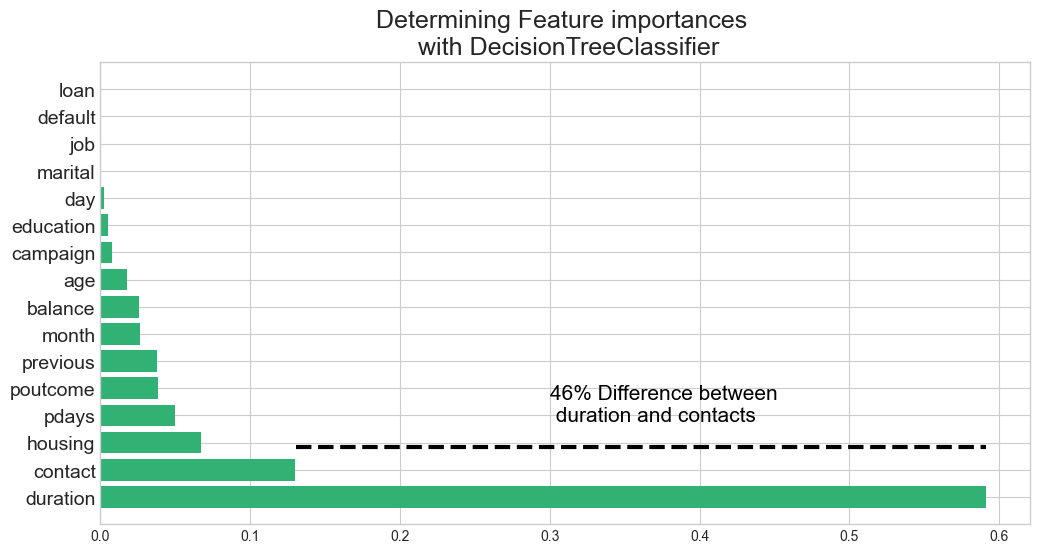

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
plt.style.use('seaborn-v0_8-whitegrid')

# Convert the columns into categorical variables
# term_deposits['job'] = term_deposits['job'].astype('category').cat.codes
# term_deposits['marital'] = term_deposits['marital'].astype('category').cat.codes
# term_deposits['education'] = term_deposits['education'].astype('category').cat.codes
# term_deposits['contact'] = term_deposits['contact'].astype('category').cat.codes
# term_deposits['poutcome'] = term_deposits['poutcome'].astype('category').cat.codes
# term_deposits['month'] = term_deposits['month'].astype('category').cat.codes
# term_deposits['default'] = term_deposits['default'].astype('category').cat.codes
# term_deposits['loan'] = term_deposits['loan'].astype('category').cat.codes
# term_deposits['housing'] = term_deposits['housing'].astype('category').cat.codes


label_class = {}
label_index = {}
for col in df: 
    if df[col].dtype == 'object':
        unique = df[col].unique()
        label_class[col] = {i: v for i, v in enumerate(sorted(df[col].unique()))}
        label_index[col] = {v: i for i, v in enumerate(sorted(df[col].unique()))}

print(label_class)
print(label_index)

print(label_index['job']['entrepreneur'])

term_deposits['job'] = term_deposits['job'].map(label_index['job'])
term_deposits['marital'] = term_deposits['marital'].map(label_index['marital'])
term_deposits['education'] = term_deposits['education'].map(label_index['education'])
term_deposits['contact'] = term_deposits['contact'].map(label_index['contact'])
term_deposits['poutcome'] = term_deposits['poutcome'].map(label_index['poutcome'])
term_deposits['month'] = term_deposits['month'].map(label_index['month'])
term_deposits['default'] = term_deposits['default'].map(label_index['default'])
term_deposits['loan'] = term_deposits['loan'].map(label_index['loan'])
term_deposits['housing'] = term_deposits['housing'].map(label_index['housing'])

print(term_deposits)

# Let's create new splittings like before but now we modified the data so we need to do it one more time.
# Create train and test splits
target_name = 'deposit'
X = term_deposits.drop('deposit', axis=1)


label=term_deposits[target_name]

X_train, X_test, y_train, y_test = train_test_split(X,label,test_size=0.2, random_state=42, stratify=label)

# Build a classification task using 3 informative features
tree = tree.DecisionTreeClassifier(
    class_weight='balanced',
    min_weight_fraction_leaf = 0.01
    
)

tree = tree.fit(X_train, y_train)
importances = tree.feature_importances_
feature_names = term_deposits.drop('deposit', axis=1).columns
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
def feature_importance_graph(indices, importances, feature_names):
    plt.figure(figsize=(12,6))
    plt.title("Determining Feature importances \n with DecisionTreeClassifier", fontsize=18)
    plt.barh(range(len(indices)), importances[indices], color='#31B173',  align="center")
    plt.yticks(range(len(indices)), feature_names[indices], rotation='horizontal',fontsize=14)
    plt.ylim([-1, len(indices)])
    plt.axhline(y=1.85, xmin=0.21, xmax=0.952, color='k', linewidth=3, linestyle='--')
    plt.text(0.30, 2.8, '46% Difference between \n duration and contacts', color='k', fontsize=15)
    
feature_importance_graph(indices, importances, feature_names)
plt.show()

In [171]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8644,46,0,1,1,0,526,0,1,0,31,5,251,3,-1,0,3
2632,46,0,1,2,0,2552,0,0,0,3,11,260,1,94,8,2
3056,25,9,2,1,0,139,0,1,0,11,4,202,1,91,1,2
1080,43,9,1,1,0,3288,1,0,0,21,9,775,3,-1,0,3
4006,37,1,2,3,0,217,0,0,0,23,11,272,2,-1,0,3


In [172]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [173]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8644,46,0,1,1,0,526,0,1,0,31,5,251,3,-1,0,3
2632,46,0,1,2,0,2552,0,0,0,3,11,260,1,94,8,2
3056,25,9,2,1,0,139,0,1,0,11,4,202,1,91,1,2
1080,43,9,1,1,0,3288,1,0,0,21,9,775,3,-1,0,3
4006,37,1,2,3,0,217,0,0,0,23,11,272,2,-1,0,3


In [174]:
y_train.head()

8644     no
2632    yes
3056    yes
1080    yes
4006    yes
Name: deposit, dtype: object

In [175]:
# Our three classifiers are grad_clf, nav_clf and neural_clf
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('nav', nav_clf), ('neural', neural_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

,estimators,"[('gbc', ...), ('nav', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'


In [176]:
from sklearn.metrics import accuracy_score

for clf in (grad_clf, nav_clf, neural_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.8463949843260188
GaussianNB 0.7514554411106136
MLPClassifier 0.716077026421854
VotingClassifier 0.8110165696372593


In [177]:
import joblib

In [ ]:
joblib.dump(voting_clf, 'bank_marketing_v01.pkl')

['bank_marketing_v01.pkl']

: 

In [156]:
X_test.sample(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1641,28,0,2,1,0,377,0,0,0,30,0,571,1,-1,0,3


In [158]:
voting_clf.predict(X_test.head(1))

# grad_clf.predict_proba([some_instance])
# grad_clf.predict([some_instance]) 


array(['yes'], dtype=object)

In [159]:
X_test.shape

(2233, 16)